Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
38 6
(32, 24, 24, 1)
Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.7393 - loss: 0.4933 - val_accuracy: 0.9115 - val_loss: 0.2182
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.1372 - val_accuracy: 0.9231 - val_loss: 0.1074
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9200 - loss: 0.2105 - val_accuracy: 0.9323 - val_loss: 0.2155
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.1284 - val_accuracy: 0.9615 - val_loss: 0.0487
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9361 - loss: 0.1484 - val_accuracy: 0.9479 - val_loss: 0.1165
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0198 - val_accuracy: 0.9231 - val_loss: 0.0703
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.9636 - loss: 0.0995 - val_accuracy: 0.9688 - val_loss: 0.0997
Epoch 8

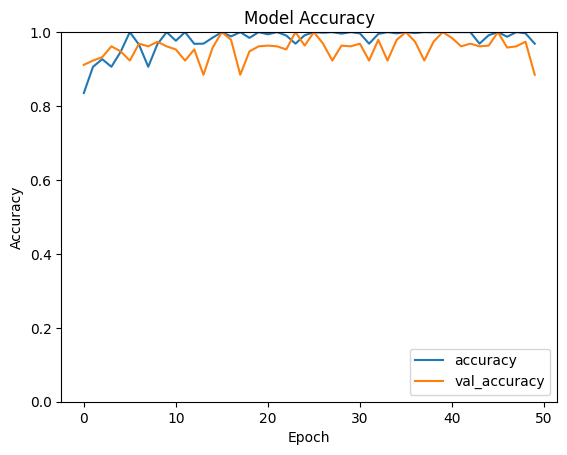

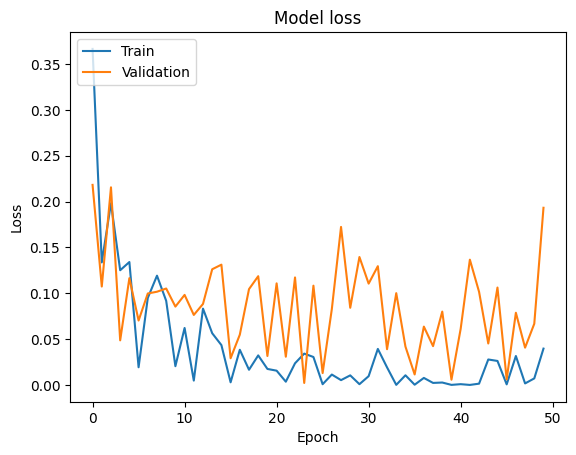

In [4]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
import random, shutil
from keras.models import Sequential
from keras.layers import (
    Dropout,
    Conv2D,
    Flatten,
    Dense,
    MaxPooling2D,
    BatchNormalization,
)
from keras.models import load_model

def generator(
    dir,
    gen=ImageDataGenerator(rescale=1.0 / 255),
    shuffle=True,
    batch_size=1,
    target_size=(24, 24),
    class_mode="categorical",
):
    return gen.flow_from_directory(
        dir,
        batch_size=batch_size,
        shuffle=shuffle,
        color_mode="grayscale",
        class_mode=class_mode,
        target_size=target_size,
    )

BS = 32
TS = (24, 24)
train_batch = generator("F:/Driver-Drowsiness-Detection-main/DDDS_CNN/dataset_new/train", shuffle=True, batch_size=BS, target_size=TS)
valid_batch = generator("F:/Driver-Drowsiness-Detection-main/DDDS_CNN/dataset_new/test", shuffle=True, batch_size=BS, target_size=TS)
SPE = len(train_batch.classes) // BS
VS = len(valid_batch.classes) // BS
print(SPE, VS)

img, labels = next(train_batch)
print(img.shape)

cnn_model = Sequential(
    [
        Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(24, 24, 1)),
        MaxPooling2D(pool_size=(1, 1)),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(1, 1)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(1, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(2, activation="softmax"),
    ]
)
cnn_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Capture history
history = cnn_model.fit(
    train_batch,
    validation_data=valid_batch,
    epochs=50,
    steps_per_epoch=SPE,
    validation_steps=VS,
)

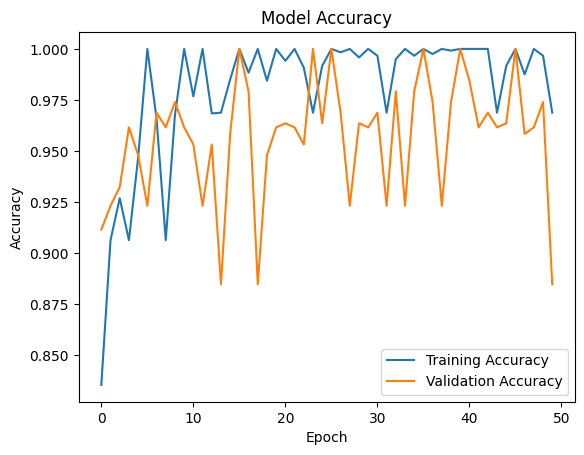

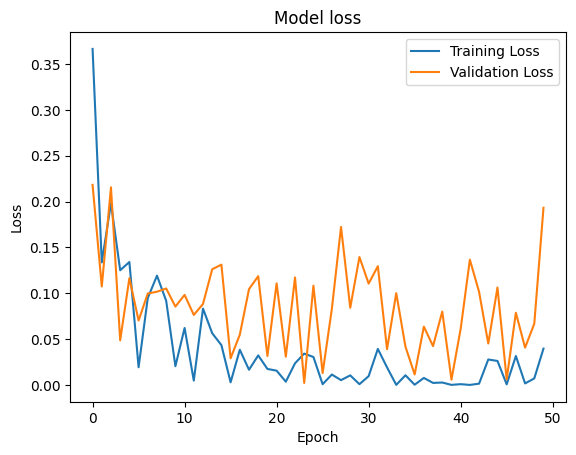

In [6]:

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Save the model
cnn_model.save("cnnCat2.h5", overwrite=True)

EAR

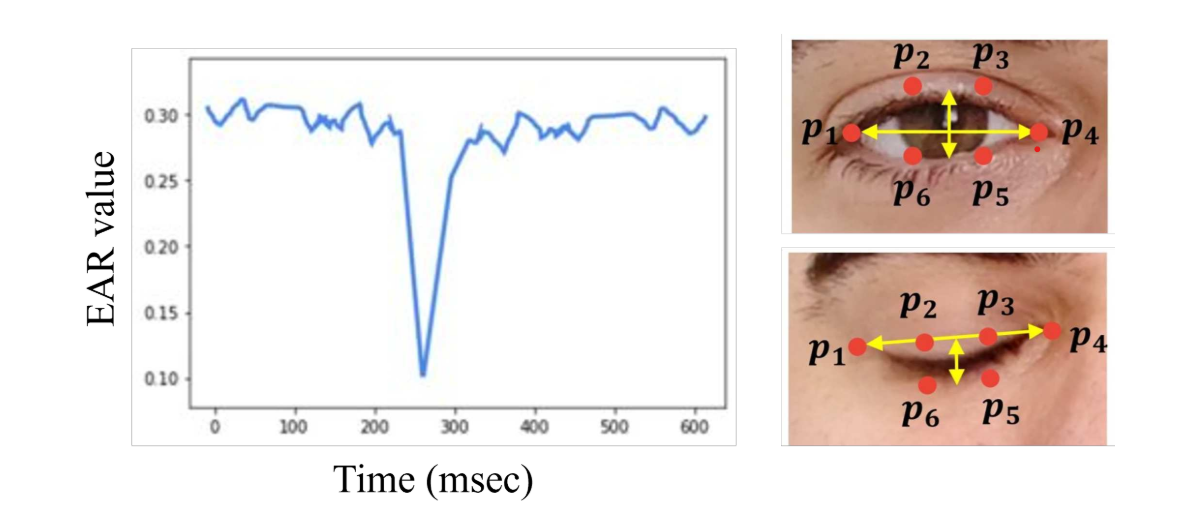

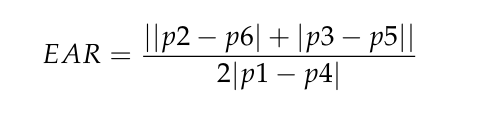

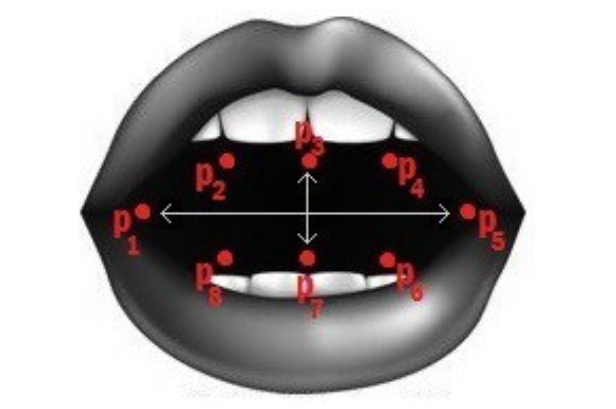

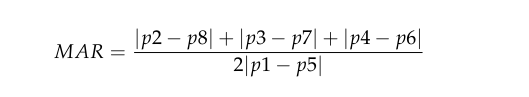

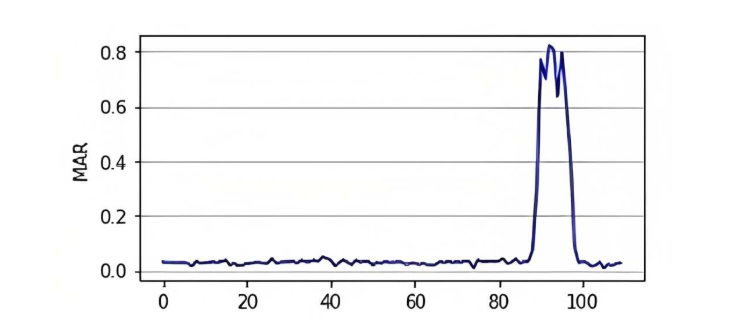

In [3]:
from PIL import Image
from IPython.display import display

img = Image.open('img.png')
img1=Image.open('img1.png')

display(img)
display(img1)


MAR

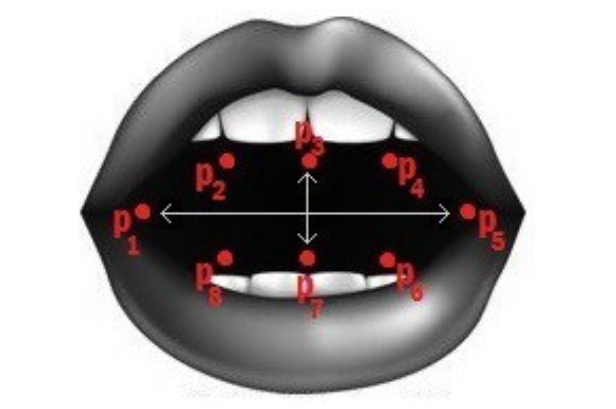

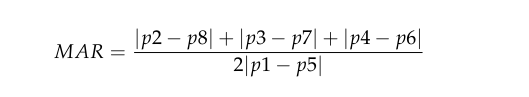

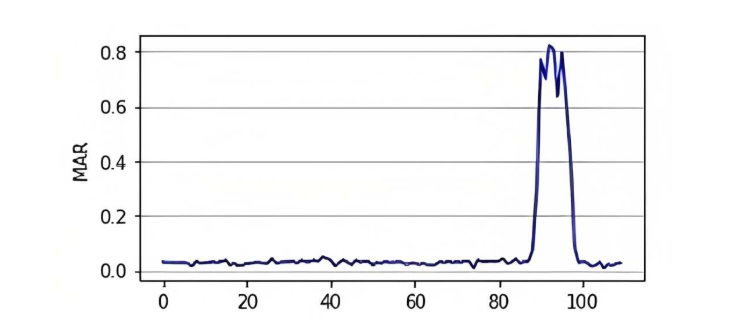

In [4]:
from PIL import Image
from IPython.display import display

img2=Image.open('m.png')
img3=Image.open('m1.png')
img4=Image.open('m2.png')

display(img2)
display(img3)
display(img4)

In [31]:
#code combined for both ear n mar

Eye Aspect Ratio (EAR): 1.169308806581402
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Drowsiness detected!
Mouth Aspect Ratio (MAR): 0.022459987164580333
Eye Aspect Ratio (EAR): 1.2671852312597793
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Drowsiness detected!
Mouth Aspect Ratio (MAR): 0.013045451257138733
Eye Aspect Ratio (EAR): 1.1496596976379365
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Mouth Aspect Ratio (MAR): 0.023627916967535054
Eye Aspect Ratio (EAR): 1.064808267466377
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Drowsiness detected!
Mouth Aspect Ratio (MAR): 0.02895011626946952
Eye Aspect Ratio (EAR): 1.0302608505096513
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Mouth Aspect Ratio (MAR): 0.02174683980216301
Eye Aspect Ratio (EAR): 1.0571343373539068
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Mouth Aspect Ratio (MAR): 0.030380515275523573
Eye Aspect Ratio (EAR): 1.0099158136329816
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Mouth Aspect Ratio (MAR): 0.319672131147541
Eye Aspect Ratio (EAR): 0.9792010648890744
1/1 

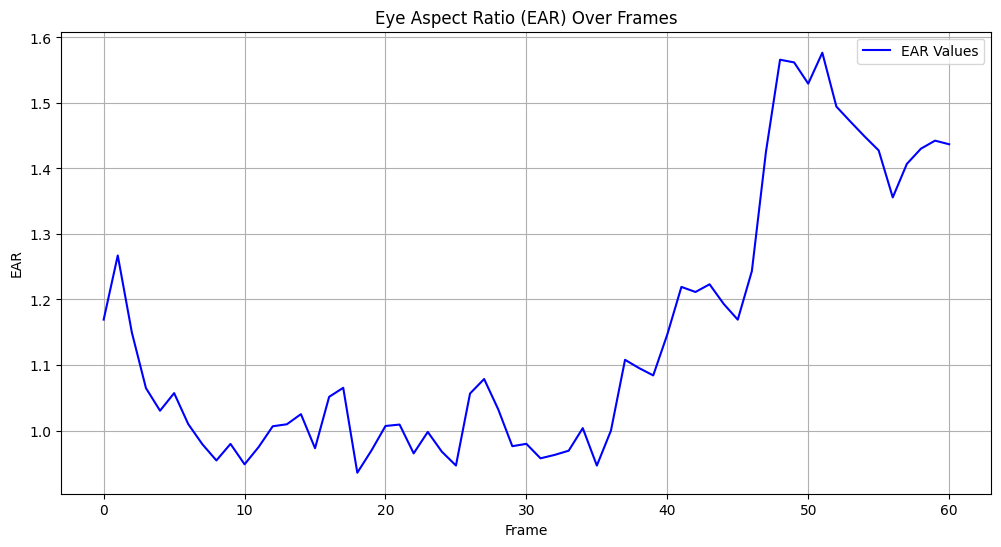

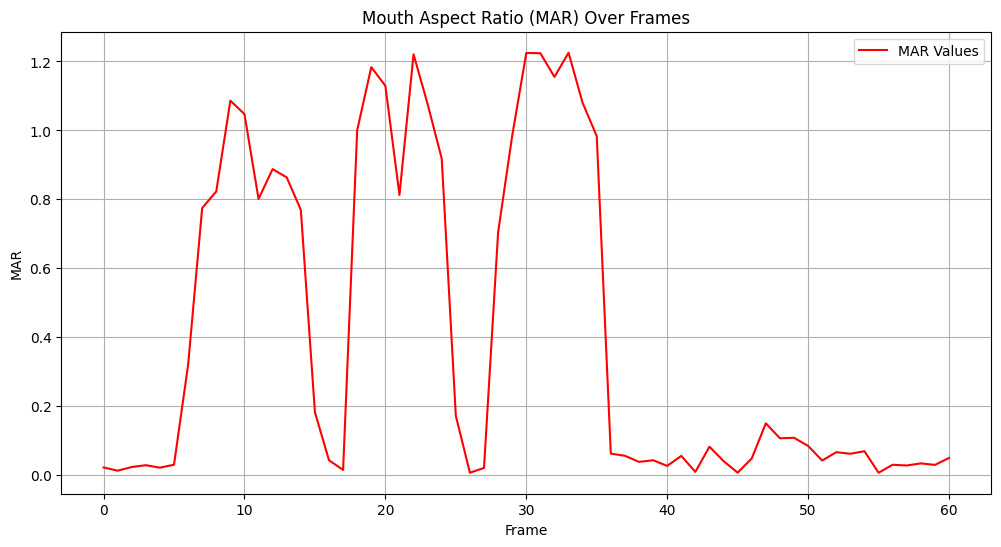

In [5]:
import os
import numpy as np
import csv
import matplotlib.pyplot as plt
from keras.models import load_model
from pygame import mixer
from mediapipe import solutions
import dlib
from scipy.spatial import distance as dist
from imutils import face_utils
import cv2
import time
import datetime
from PIL import Image
from IPython.display import display
import mysql.connector  # Import the MySQL connector library
import pandas as pd

# Path to model and resources
path = "F:/PAML/PAML"
model_path = "./cnnCat2.h5"
alarm_sound_path = "./alarm.wav"
ear_csv_path = "./ear_values.csv"
mar_csv_path = "./mar_values.csv"

mixer.init()
sound = mixer.Sound(alarm_sound_path)

# Function to calculate eye aspect ratio (EAR)
def calculate_eye_aspect_ratio(eye_landmarks):
    if len(eye_landmarks) == 6:
        eye_landmarks = np.array(eye_landmarks, dtype=np.float32)
        A = np.linalg.norm(eye_landmarks[1] - eye_landmarks[5])
        B = np.linalg.norm(eye_landmarks[2] - eye_landmarks[4])
        C = np.linalg.norm(eye_landmarks[0] - eye_landmarks[3])
        ear = (A + B) / (2.0 * C)
        return ear
    else:
        return 0
    
# img = Image.open('img.jpg')
# img1=Image.open('img1.jpg')
# display(img)
# display(img1)


# Function to calculate mouth aspect ratio (MAR)
def cal_Mar(shape):
    p1=shape[60]
    p2=shape[61]
    p3=shape[62]
    p4=shape[63]
    p5=shape[64]
    p6=shape[65]
    p7=shape[66]
    p8=shape[67]
    
    mar=((dist.euclidean(p2,p8)+dist.euclidean(p3,p7)+dist.euclidean(p4,p6))/(2*dist.euclidean(p1,p5)))
    return mar

# Function to calculate yawn distance
def cal_yawn(shape): 
    top_lip = shape[50:53] 
    top_lip = np.concatenate((top_lip, shape[61:64])) 

    low_lip = shape[56:59] 
    low_lip = np.concatenate((low_lip, shape[65:68])) 

    top_mean = np.mean(top_lip, axis=0) 
    low_mean = np.mean(low_lip, axis=0) 

    distance = dist.euclidean(top_mean,low_mean) 
    return distance

# Load the cascade classifiers for face, left eye, and right eye
face_cascade = cv2.CascadeClassifier("./haarcascade_frontalface_alt.xml")
leye_cascade = cv2.CascadeClassifier("./haarcascade_lefteye_2splits.xml")
reye_cascade = cv2.CascadeClassifier("./haarcascade_righteye_2splits.xml")

# Load the CNN model for drowsiness detection
model = load_model(model_path)

# Initialize MediaPipe face mesh solution
face_mesh = solutions.face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1)

# Initialize Dlib face detector and shape predictor for yawning detection
face_model = dlib.get_frontal_face_detector()
landmark_model = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
score = 0
ear_values = []
mar_values = []

# Open webcam for video capture
cap = cv2.VideoCapture(0)

# Initialize variables for yawning detection
yawn_counter = 0
start_time = time.time()

# Initialize variables for consecutive MAR exceeding threshold
consecutive_mar_count = 0
mar_threshold_count = 4  # Number of consecutive frames MAR should exceed threshold
mar_threshold = 0.8

# Initialize MySQL database connection
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Sugnyan7",
    database="DB1"
)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Initialize empty list to store alarm timestamps
alarm_timestamps = []

# Create a table for storing alarm timestamps if it doesn't exist
create_table_query = """
CREATE TABLE IF NOT EXISTS alarm_timestamps (
    id INT AUTO_INCREMENT PRIMARY KEY,
    timestamp DATETIME
)
"""
cursor.execute(create_table_query)

# Create a table for storing EAR values if it doesn't exist
create_ear_table_query = """
CREATE TABLE IF NOT EXISTS ear_values (
    id INT AUTO_INCREMENT PRIMARY KEY,
    frame INT,
    ear FLOAT
)
"""
cursor.execute(create_ear_table_query)

# Create a table for storing MAR values if it doesn't exist
create_mar_table_query = """
CREATE TABLE IF NOT EXISTS mar_values (
    id INT AUTO_INCREMENT PRIMARY KEY,
    frame INT,
    mar FLOAT
)
"""
cursor.execute(create_mar_table_query)

score_crossed_100 = False

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Process frame to obtain face landmarks using MediaPipe
    face_mesh_results = face_mesh.process(frame)
    
    if face_mesh_results.multi_face_landmarks:
        # Extract eye landmarks
        right_eye_landmarks = [(int(p.x * frame.shape[1]), int(p.y * frame.shape[0])) for p in face_mesh_results.multi_face_landmarks[0].landmark[36:42]]
        left_eye_landmarks = [(int(p.x * frame.shape[1]), int(p.y * frame.shape[0])) for p in face_mesh_results.multi_face_landmarks[0].landmark[42:48]]
        
        # Calculate EAR for right eye and left eye
        right_eye_ear = calculate_eye_aspect_ratio(right_eye_landmarks)
        left_eye_ear = calculate_eye_aspect_ratio(left_eye_landmarks)
        
        # Average EAR of both eyes
        ear = (right_eye_ear + left_eye_ear) / 2.0
        
        # Print EAR for monitoring
        print(f"Eye Aspect Ratio (EAR): {ear}")
        ear_values.append(ear)  # Append EAR value to list for CSV
        
        # Detect drowsiness using the CNN model and EAR calculation
        # Prepare input for the CNN model
        if leye_cascade.empty() or reye_cascade.empty():
            print("Cascade classifier failed to load.")
            continue
        
        left_eye = leye_cascade.detectMultiScale(gray)
        right_eye = reye_cascade.detectMultiScale(gray)
        
        l_eye = None
        r_eye = None
        
        for (x, y, w, h) in right_eye:
            r_eye = gray[y:y+h, x:x+w]
            r_eye = cv2.resize(r_eye, (24, 24))
            r_eye = np.expand_dims(r_eye, axis=-1)
            r_eye = np.expand_dims(r_eye, axis=0)
            break
            
        for (x, y, w, h) in left_eye:
            l_eye = gray[y:y+h, x:x+w]
            l_eye = cv2.resize(l_eye, (24, 24))
            l_eye = np.expand_dims(l_eye, axis=-1)
            l_eye = np.expand_dims(l_eye, axis=0)
            break
        
        if l_eye is None or r_eye is None:
            print("No eyes detected.")
            continue
            
        img_size = (224, 224)
        img = cv2.resize(frame, img_size)
        img = np.expand_dims(img, axis=0)
        img = img / 255.0
        
        # Predict drowsiness using the CNN model
        results = model.predict([l_eye, r_eye, img])
        
        # Extract the probability of drowsiness from CNN model prediction
        drowsiness_prob = results[0][0]
        
        if drowsiness_prob > 0.5 or ear < 0.2:
            print("Drowsiness detected!")
            score += 1
        else:
            score -= 1
        
        # Ensure sleep score is non-negative
        score = max(score, 0)
        
        # Display sleep score on the frame
        cv2.putText(frame, f"Sleep Score: {score}", (10, frame.shape[0] - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)
        
        # Check if sleep score exceeds threshold for alarm
        if score > 50 and not score_crossed_100:
            try:
                
                sound.play()
                # Record the starting timestamp when the alarm is triggered for the first time
                alarm_timestamps.append(datetime.datetime.now())
                score_crossed_100 = True
            except:
                pass
            cv2.putText(frame, "ALERT! Drowsiness Detected", (10, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
    
    # Process frame for yawning detection
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_model(img_gray) 
    
    for face in faces: 
        shapes = landmark_model(img_gray, face) 
        shape = face_utils.shape_to_np(shapes) 

        mar = cal_Mar(shape)
        lip_dist = cal_yawn(shape)
        
        # Print MAR for monitoring
        print(f"Mouth Aspect Ratio (MAR): {mar}")
        
        # Displaying MAR value
        #cv2.putText(frame, f'MAR: {mar:.2f}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        mar_values.append(mar)  # Append MAR value to list for CSV
        
        # Check if MAR exceeds threshold
        if mar > mar_threshold:
            consecutive_mar_count += 1
        else:
            consecutive_mar_count = 0
        
        # Check if MAR has exceeded threshold for consecutive frames
        if consecutive_mar_count >= mar_threshold_count:
            # Reset consecutive MAR count
            consecutive_mar_count = 0
            # Increment yawn counter
            yawn_counter += 1
            if yawn_counter>=1:
                cv2.putText(frame,f"Yawn Detected!!{yawn_counter}",(10, 80), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
            # Check if yawn counter reaches 3
            if yawn_counter >= 3:
                try:
                    
                    sound.play()
                    alarm_timestamps.append(datetime.datetime.now())
                except:
                    pass
                cv2.putText(frame, "ALERT! Yawning Detected 3 Times", (10, 110), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
                # Reset yawn counter
                yawn_counter = 0

    # Check if a minute has passed
    current_time = time.time()
    if current_time - start_time >= 60:
        # Reset yawning counter and start time
        yawn_counter = 0
        start_time = current_time

    # Display the frame
    cv2.imshow('frame', frame)
    
    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close all windows
cap.release()
cv2.destroyAllWindows()

# Insert alarm timestamps into the MySQL database
for timestamp in alarm_timestamps:
    insert_query = "INSERT INTO alarm_timestamps (timestamp) VALUES (%s)"
    cursor.execute(insert_query, (timestamp,))

# Insert EAR values into the MySQL database
for i, ear in enumerate(ear_values):
    insert_query = "INSERT INTO ear_values (frame, ear) VALUES (%s, %s)"
    cursor.execute(insert_query, (i, ear))

# Insert MAR values into the MySQL database
for i, mar in enumerate(mar_values):
    insert_query = "INSERT INTO mar_values (frame, mar) VALUES (%s, %s)"
    cursor.execute(insert_query, (i, mar))

# Commit changes to the database
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

# Save EAR values to a CSV file
with open(ear_csv_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Frame', 'EAR'])
    for i, ear in enumerate(ear_values):
        csvwriter.writerow([i, ear])

# Save MAR values to a CSV file
with open(mar_csv_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Frame', 'MAR'])
    for i, mar in enumerate(mar_values):
        csvwriter.writerow([i, mar])

# Load the EAR values from the CSV file and plot a graph
loaded_ear_values = []
with open(ear_csv_path, 'r', newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header
    for row in csvreader:
        loaded_ear_values.append(float(row[1]))

# Plotting the EAR values
plt.figure(figsize=(12, 6))
plt.plot(loaded_ear_values, label='EAR Values', color='blue')
plt.title('Eye Aspect Ratio (EAR) Over Frames')
plt.xlabel('Frame')
plt.ylabel('EAR')
plt.legend()
plt.grid(True)
plt.show()

# Load the MAR values from the CSV file and plot a graph
loaded_mar_values = []
with open(mar_csv_path, 'r', newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header
    for row in csvreader:
        loaded_mar_values.append(float(row[1]))

# Plotting the MAR values
plt.figure(figsize=(12, 6))
plt.plot(loaded_mar_values, label='MAR Values', color='red')
plt.title('Mouth Aspect Ratio (MAR) Over Frames')
plt.xlabel('Frame')
plt.ylabel('MAR')
plt.legend()
plt.grid(True)
plt.show()
